In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.set_cmap("viridis")
font = {'size'   : 20}

matplotlib.rc('font', **font)
markersize = 20

<Figure size 640x480 with 0 Axes>

In [11]:
algorithms = ['CDS-GK96', 'CDS-WAF02', 'CDS-Lam-Congest']
result_dir = "results_cds"
n_tests = 50

In [12]:
failed = {algorithm : [] for algorithm in algorithms}

In [14]:
list_n = list(range(100, 2001, 100))

In [46]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_selected_nodes = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            n_success = 0
            for i in range(n_tests):
                result_file = f"{result_dir}/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                if not os.path.isfile(result_file):
                    print(f"Algorithm {algorithm} failed at input {result_file}!")
                    failed[algorithm].append(result_file)
                    continue
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                        failed[algorithm].append(result_file)
                        continue
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    if algorithm == "CDS-Lam-Congest":
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                    all_n_selected_nodes[algorithm][n] += n_selected_nodes
                    n_success += 1
                        
            all_n_active_rounds[algorithm][n] /= n_success
            all_n_average_awake_rounds[algorithm][n] /= n_success
            all_n_selected_nodes[algorithm][n] /= n_success
            
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)
            all_n_selected_nodes[algorithm][n] = np.round(all_n_selected_nodes[algorithm][n], 2)

Algorithm CDS-GK96 failed at input results_cds/1900/sparse/CDS-GK96_005.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1700/sparse/CDS-Lam-Congest_037.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_005.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_009.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_023.txt!


In [47]:
pprint(all_n_active_rounds)

{'CDS-GK96': {100: 76.58,
              200: 116.76,
              300: 141.74,
              400: 156.36,
              500: 172.5,
              600: 197.72,
              700: 223.9,
              800: 234.7,
              900: 251.88,
              1000: 271.06,
              1100: 270.48,
              1200: 298.78,
              1300: 308.1,
              1400: 327.38,
              1500: 324.62,
              1600: 325.6,
              1700: 337.64,
              1800: 356.34,
              1900: 386.57,
              2000: 373.1},
 'CDS-Lam-Congest': {100: 323.12,
                     200: 583.2,
                     300: 736.74,
                     400: 902.0,
                     500: 975.0,
                     600: 1221.12,
                     700: 1475.42,
                     800: 1514.26,
                     900: 1680.28,
                     1000: 1782.84,
                     1100: 1981.7,
                     1200: 2101.14,
                     1300: 2273.78,
     

In [48]:
pprint(all_n_average_awake_rounds)

{'CDS-GK96': {100: 76.58,
              200: 116.76,
              300: 141.74,
              400: 156.36,
              500: 172.5,
              600: 197.72,
              700: 223.9,
              800: 234.7,
              900: 251.88,
              1000: 271.06,
              1100: 270.48,
              1200: 298.78,
              1300: 308.1,
              1400: 327.38,
              1500: 324.62,
              1600: 325.6,
              1700: 337.64,
              1800: 356.34,
              1900: 386.57,
              2000: 373.1},
 'CDS-Lam-Congest': {100: 47.27,
                     200: 56.76,
                     300: 60.1,
                     400: 63.3,
                     500: 62.28,
                     600: 68.48,
                     700: 73.84,
                     800: 74.68,
                     900: 76.17,
                     1000: 77.0,
                     1100: 79.02,
                     1200: 79.1,
                     1300: 81.15,
                     1400:

In [49]:
pprint(all_n_selected_nodes)

{'CDS-GK96': {100: 35.94,
              200: 71.1,
              300: 107.52,
              400: 136.66,
              500: 162.84,
              600: 201.66,
              700: 236.34,
              800: 268.42,
              900: 295.36,
              1000: 331.82,
              1100: 361.92,
              1200: 392.54,
              1300: 411.78,
              1400: 444.72,
              1500: 475.04,
              1600: 493.0,
              1700: 524.62,
              1800: 565.08,
              1900: 595.53,
              2000: 640.18},
 'CDS-Lam-Congest': {100: 36.5,
                     200: 71.74,
                     300: 108.38,
                     400: 137.18,
                     500: 163.6,
                     600: 202.16,
                     700: 236.98,
                     800: 269.06,
                     900: 296.1,
                     1000: 332.46,
                     1100: 362.24,
                     1200: 393.16,
                     1300: 412.56,
           

In [50]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/cds_average_awake.csv")
df_average_awake

,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,76.58,55.56,47.27
200,116.76,76.24,56.76
300,141.74,92.18,60.10
400,156.36,98.70,63.30
500,172.50,111.04,62.28
600,197.72,119.72,68.48
700,223.90,136.42,73.84
800,234.70,137.72,74.68
900,251.88,142.58,76.17
1000,271.06,153.92,77.00


In [51]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/cds_active_rounds.csv")
df_active_rounds

,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,76.58,55.56,323.12
200,116.76,76.24,583.20
300,141.74,92.18,736.74
400,156.36,98.70,902.00
500,172.50,111.04,975.00
600,197.72,119.72,1221.12
700,223.90,136.42,1475.42
800,234.70,137.72,1514.26
900,251.88,142.58,1680.28
1000,271.06,153.92,1782.84


In [44]:
df_active_rounds["CDS-GK96"]

100      35.94
200      71.10
300     107.52
400     136.66
500     162.84
600     201.66
700     236.34
800     268.42
900     295.36
1000    331.82
1100    361.92
1200    392.54
1300    411.78
1400    444.72
1500    475.04
1600    493.00
1700    524.62
1800    565.08
1900    595.53
2000    640.18
Name: CDS-GK96, dtype: float64

In [52]:
df_active_rounds["CDS-Lam-Congest"]

100      323.12
200      583.20
300      736.74
400      902.00
500      975.00
600     1221.12
700     1475.42
800     1514.26
900     1680.28
1000    1782.84
1100    1981.70
1200    2101.14
1300    2273.78
1400    2214.16
1500    2462.02
1600    2406.30
1700    2642.00
1800    2862.42
1900    2671.32
2000    3007.60
Name: CDS-Lam-Congest, dtype: float64

In [37]:
df_active_rounds = pd.DataFrame(all_n_selected_nodes)
df_active_rounds.to_csv("stat/cds_size.csv")
df_active_rounds

,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,35.94,33.82,36.50
200,71.10,67.20,71.74
300,107.52,103.16,108.38
400,136.66,131.70,137.18
500,162.84,159.28,163.60
600,201.66,199.08,202.16
700,236.34,234.10,236.98
800,268.42,264.68,269.06
900,295.36,293.36,296.10
1000,331.82,329.20,332.46


In [42]:
def plot_df_active_rounds(
    df,
    title="Number of active rounds of different CDS algorithms",
    y_title=-0.2
):
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    r = df.index.values[1::2]
    ax.plot(r, np.log(df["CDS-GK96"].values[1::2]), marker='v', markersize=markersize, label="CDS-GK96")
    ax.plot(r, np.log(df["CDS-WAF02"].values[1::2]), marker='D', markersize=markersize, label="CDS-WAF02")
    ax.plot(r, np.log(df["CDS-Lam-Congest"].values[1::2]), marker='x', markersize=markersize, label="CDS-Ours")
    ax.set_yticks([15, 18, 21, 24, 27, 30])
    ax.set_ylabel("Number of active rounds")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    plt.grid()
    return ax

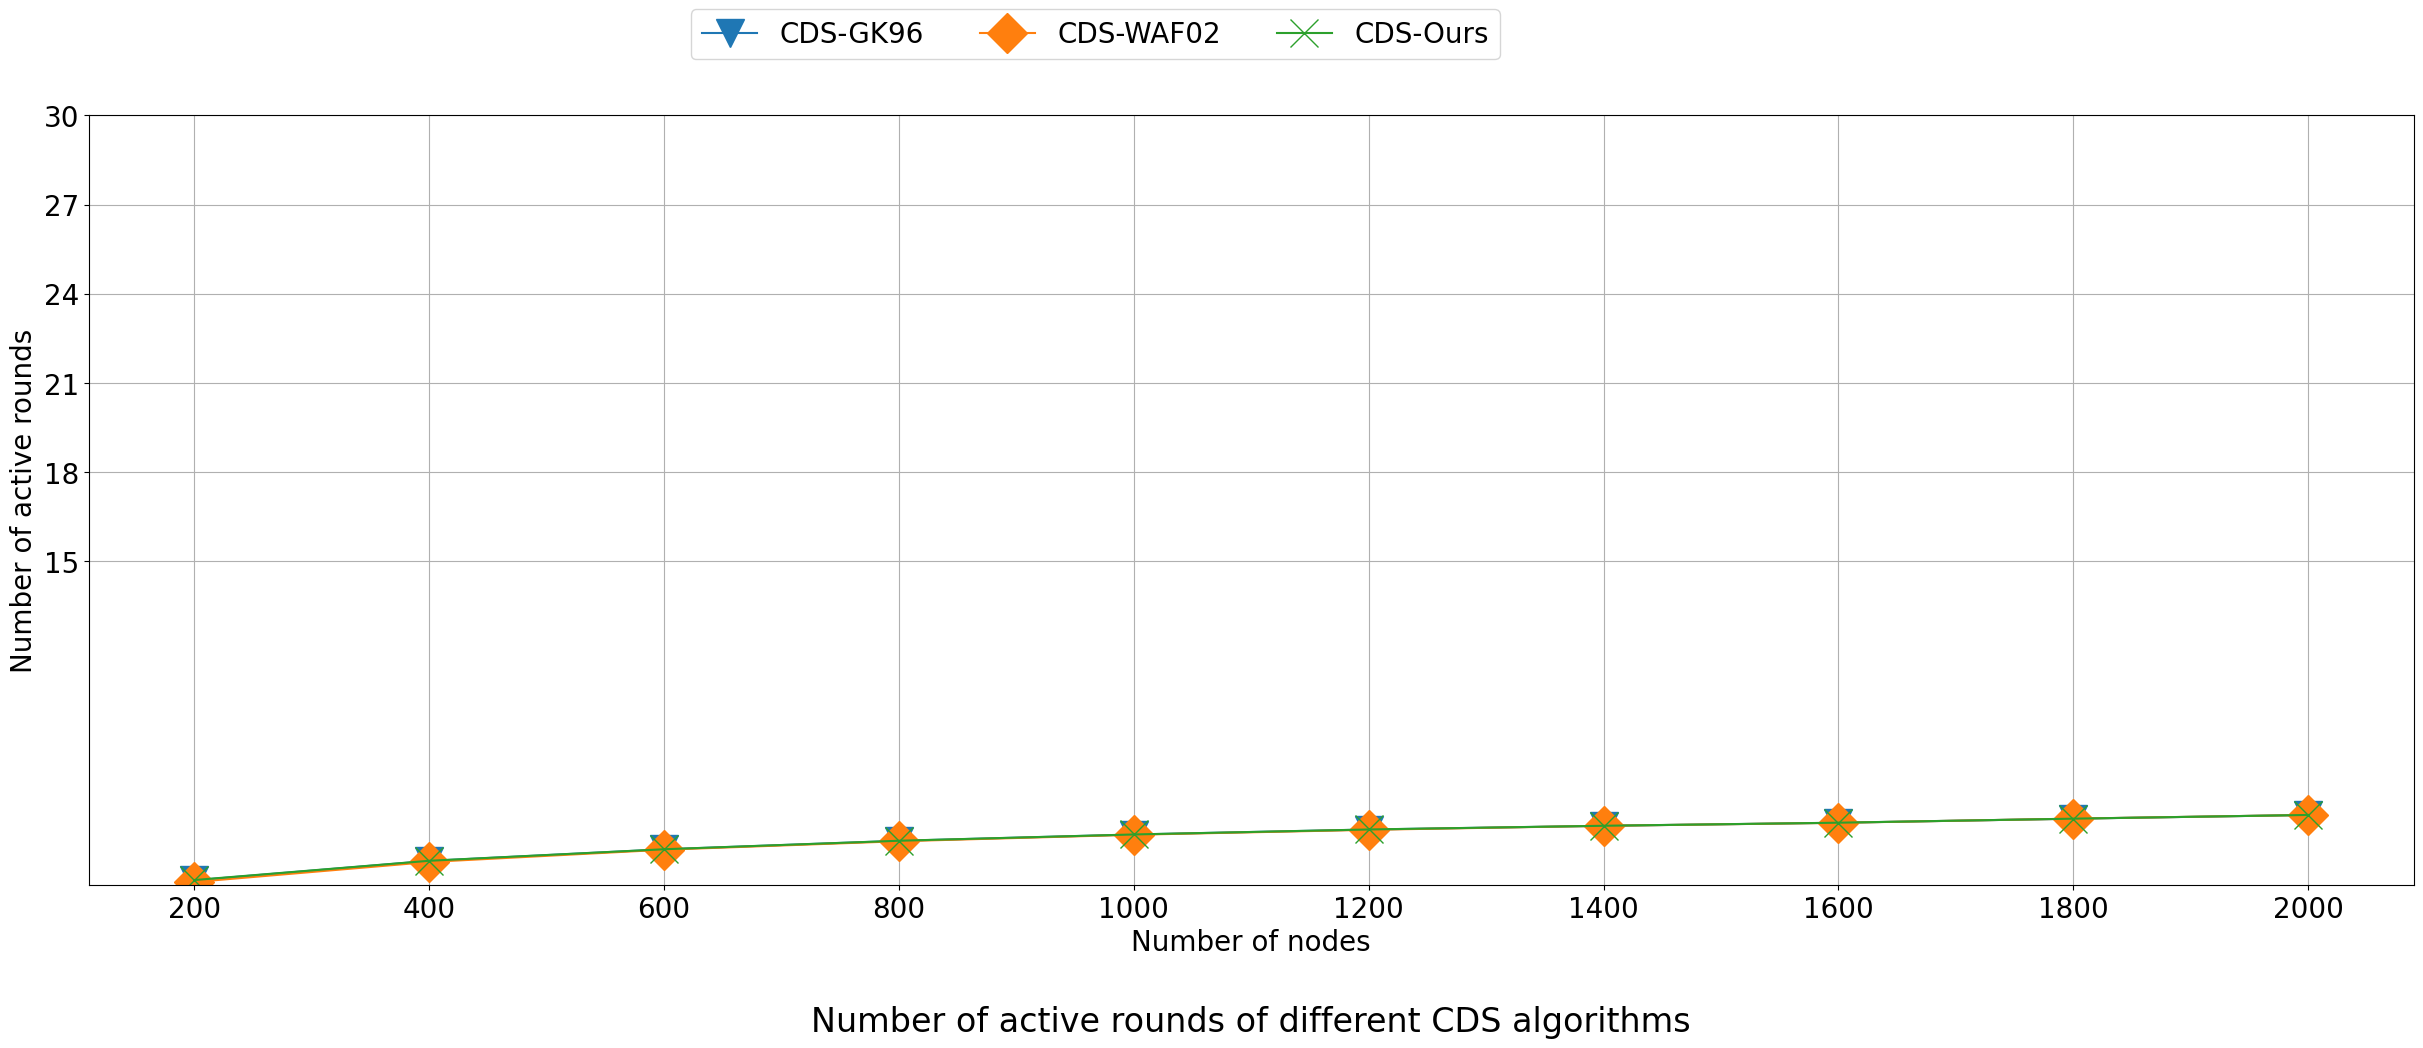

In [43]:
plot_df_active_rounds(df_active_rounds)
plt.savefig("stat/cds_active_rounds.pdf", bbox_inches="tight")

In [16]:
def plot_df_awake_rounds(
    df,
    title="Number of average awake rounds of different algorithms",
    y_title=-0.2
):
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    r = df.index.values[1::2]
    ax.plot(r, df["MIS-GP22"].values[1::2], marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-Luby"].values[1::2], marker='x', markersize=markersize, label="MIS-Luby")
    ax.plot(r, df["MIS-SW08"].values[1::2], marker='D', markersize=markersize, label="MIS-SW08")
    ax.plot(r, df["MIS-Lam"].values[1::2], marker='o', markersize=markersize, label="MIS-Ours")
    ax.set_yticks(list(range(0,31,5)))
    ax.set_ylabel("Number of average awake rounds")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    plt.grid()
    return ax

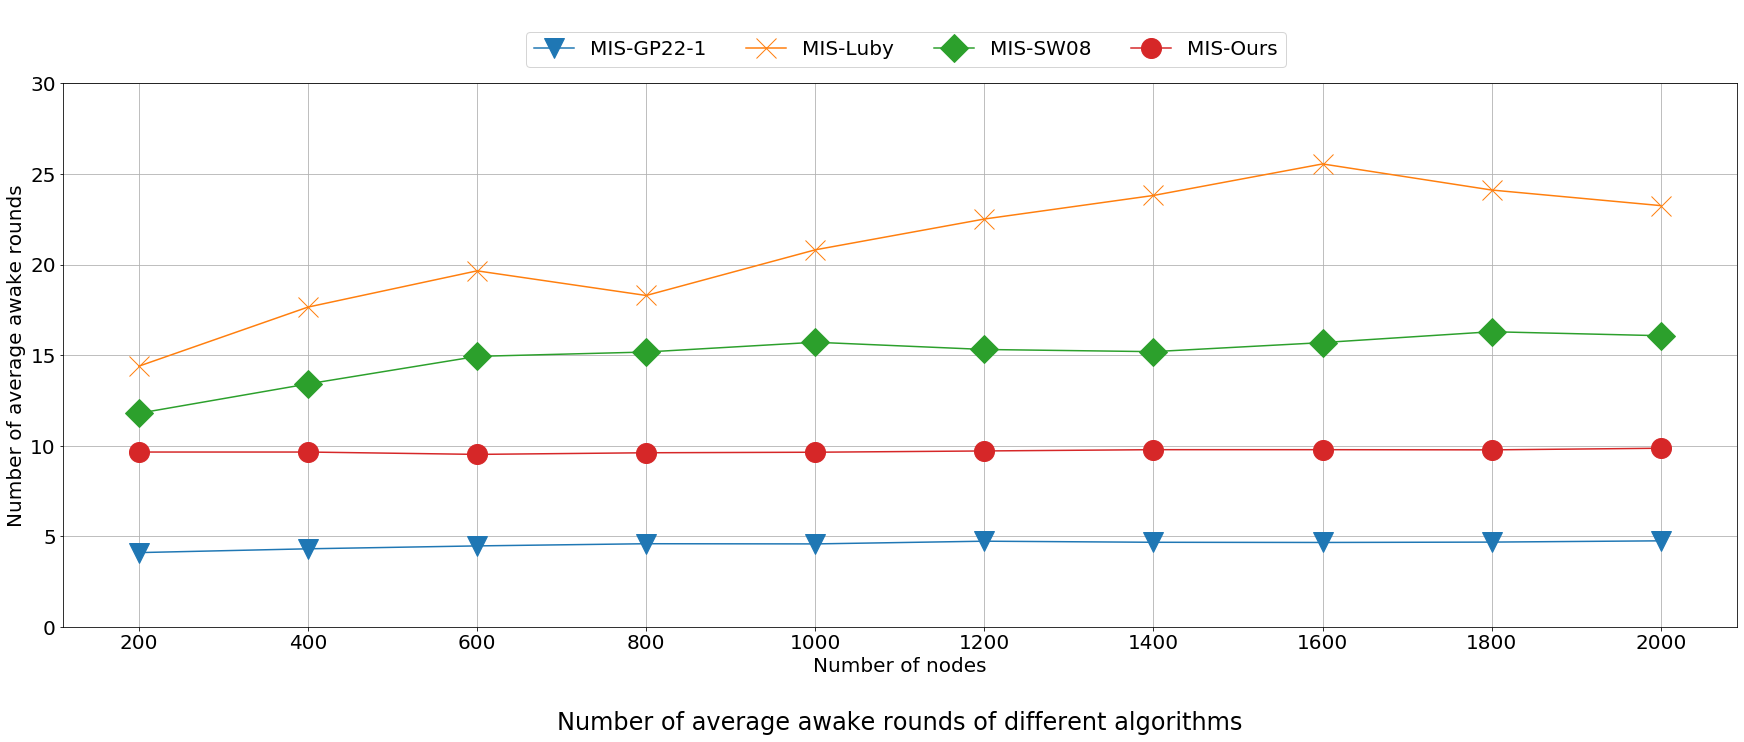

In [17]:
plot_df_awake_rounds(df_average_awake)
plt.savefig("stat/mis_average_awake.pdf", bbox_inches="tight")

In [4]:
import numpy as np

In [10]:
a = np.fft.fft([1,4,7,8])

In [11]:
b = np.fft.ifft([1,4,7,8])

In [12]:
a/b

array([4.        +0.j        , 1.53846154-3.69230769j,
       4.        -0.j        , 1.53846154+3.69230769j])

In [13]:
a

array([20.+0.j, -6.+4.j, -4.+0.j, -6.-4.j])

In [14]:
b

array([ 5. +0.j, -1.5-1.j, -1. +0.j, -1.5+1.j])

In [7]:
c = np.fft.fft([-3,3,2,4,3,1,2,0])

In [8]:
d = np.fft.ifft([-3,3,2,4,3,1,2,0])

In [9]:
c/d

array([8.        +0.j        , 4.05320297+6.89721289j,
       8.        -0.j        , 0.62095433+7.97586458j,
       8.        -0.j        , 0.62095433-7.97586458j,
       8.        -0.j        , 4.05320297-6.89721289j])